In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(8555, 3)

In [6]:
df.Gender.value_counts()

Male      5000
Female    3555
Name: Gender, dtype: int64

# One Hot Enocding of Gender

In [7]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
dummy=pd.get_dummies(df.Gender, drop_first=True)
dummy.head()

,Male
0,1
1,1
2,1
3,1
4,1


# Standard Scalar

In [8]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [9]:
y=df["Weight"]

In [10]:
z=df.drop(["Gender", "Weight"], axis=1)

In [11]:
z.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [12]:
z=std.fit_transform(z)

In [13]:
df_1=pd.DataFrame(z, columns=["Height"])

In [14]:
df_1.head()

,Height
0,1.827233
1,0.512039
2,1.895545
3,1.277788
4,0.797634


In [15]:
df=pd.concat([df_1, dummy], axis=1)

In [16]:
df.head()

,Height,Male
0,1.827233,1
1,0.512039,1
2,1.895545,1
3,1.277788,1
4,0.797634,1


In [17]:
df.describe()

,Height,Male
count,8.555000e+03,8555.000000
mean,-1.132804e-15,0.584454
std,1.000058e+00,0.492845
min,-3.166020e+00,0.000000
25%,-7.406054e-01,0.000000
50%,4.569924e-02,1.000000
75%,7.256130e-01,1.000000
max,3.541746e+00,1.000000


In [18]:
x=df

In [153]:
x.head()

,Height,Male
0,1.827233,1
1,0.512039,1
2,1.895545,1
3,1.277788,1
4,0.797634,1


In [19]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [20]:
y.shape

(8555,)

# Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=0.3,random_state=102)

In [22]:
xtrain.shape

(5988, 2)

In [23]:
ytrain.shape

(5988,)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression as LR
reg=LR()

In [25]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [26]:
reg.coef_

array([23.0273989 , 19.36816948])

In [27]:
reg.intercept_

154.40597364683094

In [28]:
ypred=reg.predict(xtest)

In [29]:
from sklearn.metrics import mean_squared_error as mse

In [30]:
mse(ytest, ypred)

99.4022430570895

In [31]:
rmse=(mse(ytest, ypred))**(0.5)

In [32]:
rmse

9.970067354691718

In [33]:
from sklearn.metrics import r2_score
score=r2_score(ytest, ypred)
score

0.9035587499789787

# kNN Regression_default

In [74]:
from sklearn.neighbors import KNeighborsRegressor 
import matplotlib.pyplot as plt
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [75]:
knn=KNeighborsRegressor()

In [76]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [77]:
ypred_knn=knn.predict(xtest)

In [78]:
mse(ytest, ypred_knn)

120.33095991615241

In [79]:
rmse=(mse(ytest, ypred_knn))**(0.5)

In [80]:
rmse

10.969546933039323

In [81]:
knn.score(xtest,ytest)

0.8832534575313542

# Hyperparameter Tuning_knn_GridsearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [69]:
knn_params = [{'n_neighbors': list(range(1,500,5))}]

In [70]:
regressor=GridSearchCV(knn, knn_params, scoring='neg_mean_squared_error', cv=10 )

In [71]:
regressor.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=999),
             param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                          51, 56, 61, 66, 71, 76, 81, 86, 91,
                                          96, 101, 106, 111, 116, 121, 126, 131,
                                          136, 141, 146, ...]}],
             scoring='neg_mean_squared_error')

In [72]:
regressor.best_score_

-107.05436981515709

In [73]:
regressor.best_estimator_

KNeighborsRegressor(n_neighbors=81)

# Hyperparameter Tuning_knn

In [55]:
errors=[]
for i in range(1,1000,1):
    knn=knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred_knn=knn.predict(xtest)
    errors.append(np.mean((ypred_knn-ytest)))

In [56]:
errors

[0.1892878892169851,
 0.32125984855083717,
 0.37090218668744557,
 0.3596643783424242,
 0.3403346399906518,
 0.38075246279768876,
 0.31151080866993197,
 0.2616838757065655,
 0.25878353110159025,
 0.2768053116151158,
 0.29314986773346985,
 0.3187437974386453,
 0.3151553888451056,
 0.3124053415164998,
 0.3056254709359827,
 0.29229752666463854,
 0.27613456220238725,
 0.27264611974332364,
 0.25881365442478366,
 0.2705134376821193,
 0.24239715838035802,
 0.24474844879838625,
 0.2459462816708728,
 0.24765740208219658,
 0.24203366070261093,
 0.24807522591096998,
 0.2589529760088881,
 0.2666872739680853,
 0.26061328976210113,
 0.26305957785028,
 0.2623644812840409,
 0.2780228889171459,
 0.27426272130361024,
 0.27928034001420815,
 0.2721286551087995,
 0.2719433187375034,
 0.26886858789795787,
 0.282641632815186,
 0.2778496180805699,
 0.2779765924928906,
 0.2851130311291543,
 0.2776795463570602,
 0.27808724874199436,
 0.27555050277552434,
 0.27341275872622706,
 0.26528793655154953,
 0.26945972986

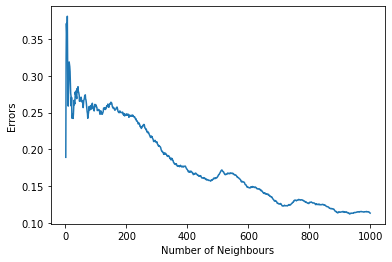

In [57]:
import matplotlib.pyplot as plt
plt.xlabel('Number of Neighbours')
plt.ylabel('Errors')
plt.plot(range(1,1000,1), errors)

In [ ]:
#Investigate from 1 to 500

In [ ]:
errors=[]
for i in range(1,500,1):
    knn=knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred_knn=knn.predict(xtest)
    errors.append(np.mean((ypred_knn-ytest)))

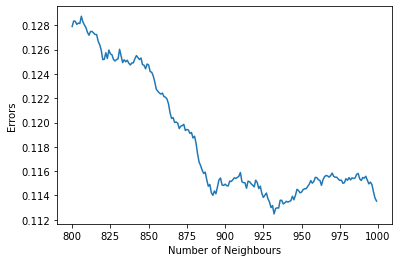

In [63]:
import matplotlib.pyplot as plt
plt.xlabel('Number of Neighbours')
plt.ylabel('Errors')
plt.plot(range(1,500,1), errors)

# Best kNN_based on GridSearch CV

In [82]:
knn=KNeighborsRegressor(n_neighbors=81)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=81)

In [83]:
ypred_knn=knn.predict(xtest)

In [84]:
mse(ytest, ypred_knn)

100.41298264600621

In [85]:
rmse=(mse(ytest, ypred_knn))**(0.5)

In [86]:
rmse

10.020627856876345

In [87]:
knn.score(xtest,ytest)

0.9025781182909706